In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean
from tabulate import tabulate
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns

# 1. Data Steps

Load patient_priority.csv into a pandas dataframe.

In [2]:
data = pd.read_csv('patient_priority.csv')
data.head()

Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
0           0  40.0     1.0              2.0           140.0        294.0   
1           1  49.0     0.0              3.0           160.0        180.0   
2           2  37.0     1.0              2.0           130.0        294.0   
3           3  48.0     0.0              4.0           138.0        214.0   
4           4  54.0     1.0              3.0           150.0        195.0   

   max heart rate  exercise angina  plasma glucose  skin_thickness  insulin  \
0           172.0              0.0           108.0            43.0     92.0   
1           156.0              0.0            75.0            47.0     90.0   
2           156.0              0.0            98.0            53.0    102.0   
3           156.0              1.0            72.0            51.0    118.0   
4           156.0              0.0           108.0            90.0     83.0   

    bmi  diabetes_pedigree  hypertension  heart_disease Residence_type  \
0  19.0           0.467386           0.0            0.0          Urban   
1  18.0           0.467386           0.0            0.0          Urban   
2  23.0           0.467386           0.0            0.0          Urban   
3  18.0           0.467386           0.0            0.0          Urban   
4  21.0           0.467386           0.0            0.0          Urban   

  smoking_status  triage  
0   never smoked  yellow  
1   never smoked  orange  
2   never smoked  yellow  
3   never smoked  orange  
4   never smoked  yellow

Drop the 'triage' column and print out the header.

In [3]:
# Dropping the 'triage' column
data = data.drop(columns=['triage'])

# Printing the header of the dataframe
data.head()

Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
0           0  40.0     1.0              2.0           140.0        294.0   
1           1  49.0     0.0              3.0           160.0        180.0   
2           2  37.0     1.0              2.0           130.0        294.0   
3           3  48.0     0.0              4.0           138.0        214.0   
4           4  54.0     1.0              3.0           150.0        195.0   

   max heart rate  exercise angina  plasma glucose  skin_thickness  insulin  \
0           172.0              0.0           108.0            43.0     92.0   
1           156.0              0.0            75.0            47.0     90.0   
2           156.0              0.0            98.0            53.0    102.0   
3           156.0              1.0            72.0            51.0    118.0   
4           156.0              0.0           108.0            90.0     83.0   

    bmi  diabetes_pedigree  hypertension  heart_disease Residence_type  \
0  19.0           0.467386           0.0            0.0          Urban   
1  18.0           0.467386           0.0            0.0          Urban   
2  23.0           0.467386           0.0            0.0          Urban   
3  18.0           0.467386           0.0            0.0          Urban   
4  21.0           0.467386           0.0            0.0          Urban   

  smoking_status  
0   never smoked  
1   never smoked  
2   never smoked  
3   never smoked  
4   never smoked

### Column Descriptions:
1. **age**: The age of the patient.
2. **gender**: Gender of the patient (1 = male, 0 = female).
3. **chest pain type**: A numerical value representing the type of chest pain:
   - 1: Typical Angina
   - 2: Atypical Angina
   - 3: Non-anginal Pain
   - 4: Asymptomatic
4. **blood pressure**: Systolic blood pressure of the patient (measured in mm Hg).
5. **cholesterol**: Serum cholesterol level (measured in mg/dl).
6. **max heart rate**: The maximum heart rate achieved by the patient during physical activity.
7. **exercise angina**: Indicates if the patient experienced angina during exercise (1 = Yes, 0 = No).
8. **plasma glucose**: Blood glucose level (measured in mg/dl).
9. **skin thickness**: The thickness of the skin fold (measured in mm).
10. **insulin**: Insulin level in the blood (measured in μU/ml).
11. **bmi**: Body mass index, which is the ratio of weight to height (kg/m²).
12. **diabetes_pedigree**: A function that scores the likelihood of diabetes based on family history.
13. **hypertension**: Indicates whether the patient has high blood pressure (1 = Yes, 0 = No).
14. **heart_disease**: Indicates whether the patient has heart disease (1 = Yes, 0 = No).
15. **Residence_type**: Whether the patient resides in an Urban or Rural area.
16. **smoking_status**: The smoking status of the patient:
    - never smoked
    - formerly smoked
    - smokes
    - unknown

### Observations:
- **Age**: The average age of the patients is around 57, with a minimum of 28 and a maximum of 82.
- **Gender**: The dataset contains a relatively even distribution of males (1) and females (0).
- **Cholesterol**: The cholesterol values vary significantly, with the minimum being 150 and the maximum at 294.
- **Max Heart Rate**: The average max heart rate is around 163, which is normal for many individuals.
- **Exercise Angina**: Most patients do not experience angina during exercise, as seen by the high percentage of zeros in this column.
- **Diabetes Pedigree**: The pedigree function is relatively low for most patients, indicating a moderate likelihood of diabetes based on family history.

This dataset contains key health metrics and lifestyle factors that are essential for determining patient prioritization in healthcare settings. It will be useful for clustering patients based on their urgency of medical care.

## Verifying the data type of each entry and if there are any missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6962 non-null   int64  
 1   age                6962 non-null   float64
 2   gender             6961 non-null   float64
 3   chest pain type    6962 non-null   float64
 4   blood pressure     6962 non-null   float64
 5   cholesterol        6962 non-null   float64
 6   max heart rate     6962 non-null   float64
 7   exercise angina    6962 non-null   float64
 8   plasma glucose     6962 non-null   float64
 9   skin_thickness     6962 non-null   float64
 10  insulin            6962 non-null   float64
 11  bmi                6962 non-null   float64
 12  diabetes_pedigree  6962 non-null   float64
 13  hypertension       6962 non-null   float64
 14  heart_disease      6962 non-null   float64
 15  Residence_type     6962 non-null   object 
 16  smoking_status     6962 

In [5]:
# Check for duplicate rows in the dataset
duplicate_rows = data[data.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [Unnamed: 0, age, gender, chest pain type, blood pressure, cholesterol, max heart rate, exercise angina, plasma glucose, skin_thickness, insulin, bmi, diabetes_pedigree, hypertension, heart_disease, Residence_type, smoking_status]
Index: []

In [6]:
# Displaing amount of null values per each feature
data.isnull().sum()

Unnamed: 0           0
age                  0
gender               1
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
dtype: int64

In [7]:
# Verifying any conexion with other features when MINIMUM_PAYMENTS values are null
data[data['gender'].isnull()]

Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
4968        3116  72.0     NaN              0.0            85.0        160.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
4968           178.0              0.0          143.33            87.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
4968    116.0  22.4           0.467386           0.0            0.0   

     Residence_type   smoking_status  
4968          Rural  formerly smoked

In [8]:
# Filling the missing value in the 'gender' column with the mode (most frequent value)
data['gender'].fillna(data['gender'].mode()[0], inplace=True)

# Check if the missing value has been filled
data.isnull().sum()

Unnamed: 0           0
age                  0
gender               0
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
dtype: int64

### Observations:

1. **Missing Values**:
   Upon reviewing the dataset, there was one missing value in the `gender` column. All other columns were complete with no missing values. It’s important to handle missing values as they can affect the performance of machine learning algorithms.

2. **Duplicate Rows**:
   A check for duplicate rows revealed that there were no duplicate entries in the dataset, which means we did not need to remove any duplicate data.

3. **Data Types**:
   The dataset contains both numerical and categorical data. The categorical columns (`Residence_type` and `smoking_status`) were one-hot encoded, which is necessary for most machine learning models to process categorical variables.

In [9]:
# Using pandas.get_dummies to one-hot encode 'Residence_type' and 'smoking_status'
data = pd.get_dummies(data, columns=['Residence_type', 'smoking_status'], drop_first=True)

# Display the first few rows to verify one-hot encoding
data.head()

Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
0           0  40.0     1.0              2.0           140.0        294.0   
1           1  49.0     0.0              3.0           160.0        180.0   
2           2  37.0     1.0              2.0           130.0        294.0   
3           3  48.0     0.0              4.0           138.0        214.0   
4           4  54.0     1.0              3.0           150.0        195.0   

   max heart rate  exercise angina  plasma glucose  skin_thickness  insulin  \
0           172.0              0.0           108.0            43.0     92.0   
1           156.0              0.0            75.0            47.0     90.0   
2           156.0              0.0            98.0            53.0    102.0   
3           156.0              1.0            72.0            51.0    118.0   
4           156.0              0.0           108.0            90.0     83.0   

    bmi  diabetes_pedigree  hypertension  heart_disease  Residence_type_Urban  \
0  19.0           0.467386           0.0            0.0                     1   
1  18.0           0.467386           0.0            0.0                     1   
2  23.0           0.467386           0.0            0.0                     1   
3  18.0           0.467386           0.0            0.0                     1   
4  21.0           0.467386           0.0            0.0                     1   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               0                            1   
1                               0                            1   
2                               0                            1   
3                               0                            1   
4                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

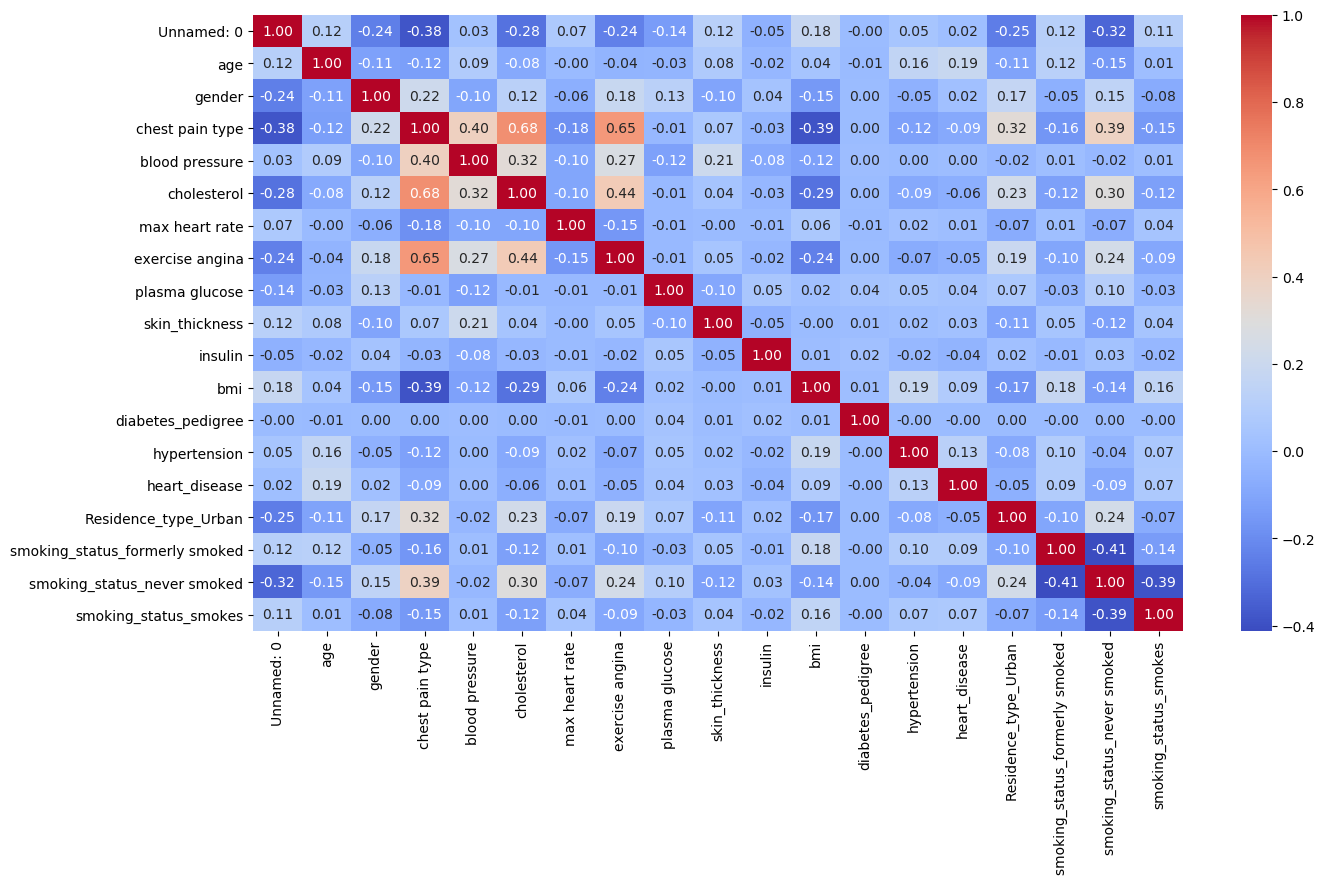

In [10]:
# (using corr function in pandas to obatin correlation of columns), using cmap = 'coolwarm'
# to differentiate high, low, and medium correlations
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot=True, fmt=".2f")
plt.show()

<Figure size 1000x800 with 0 Axes>

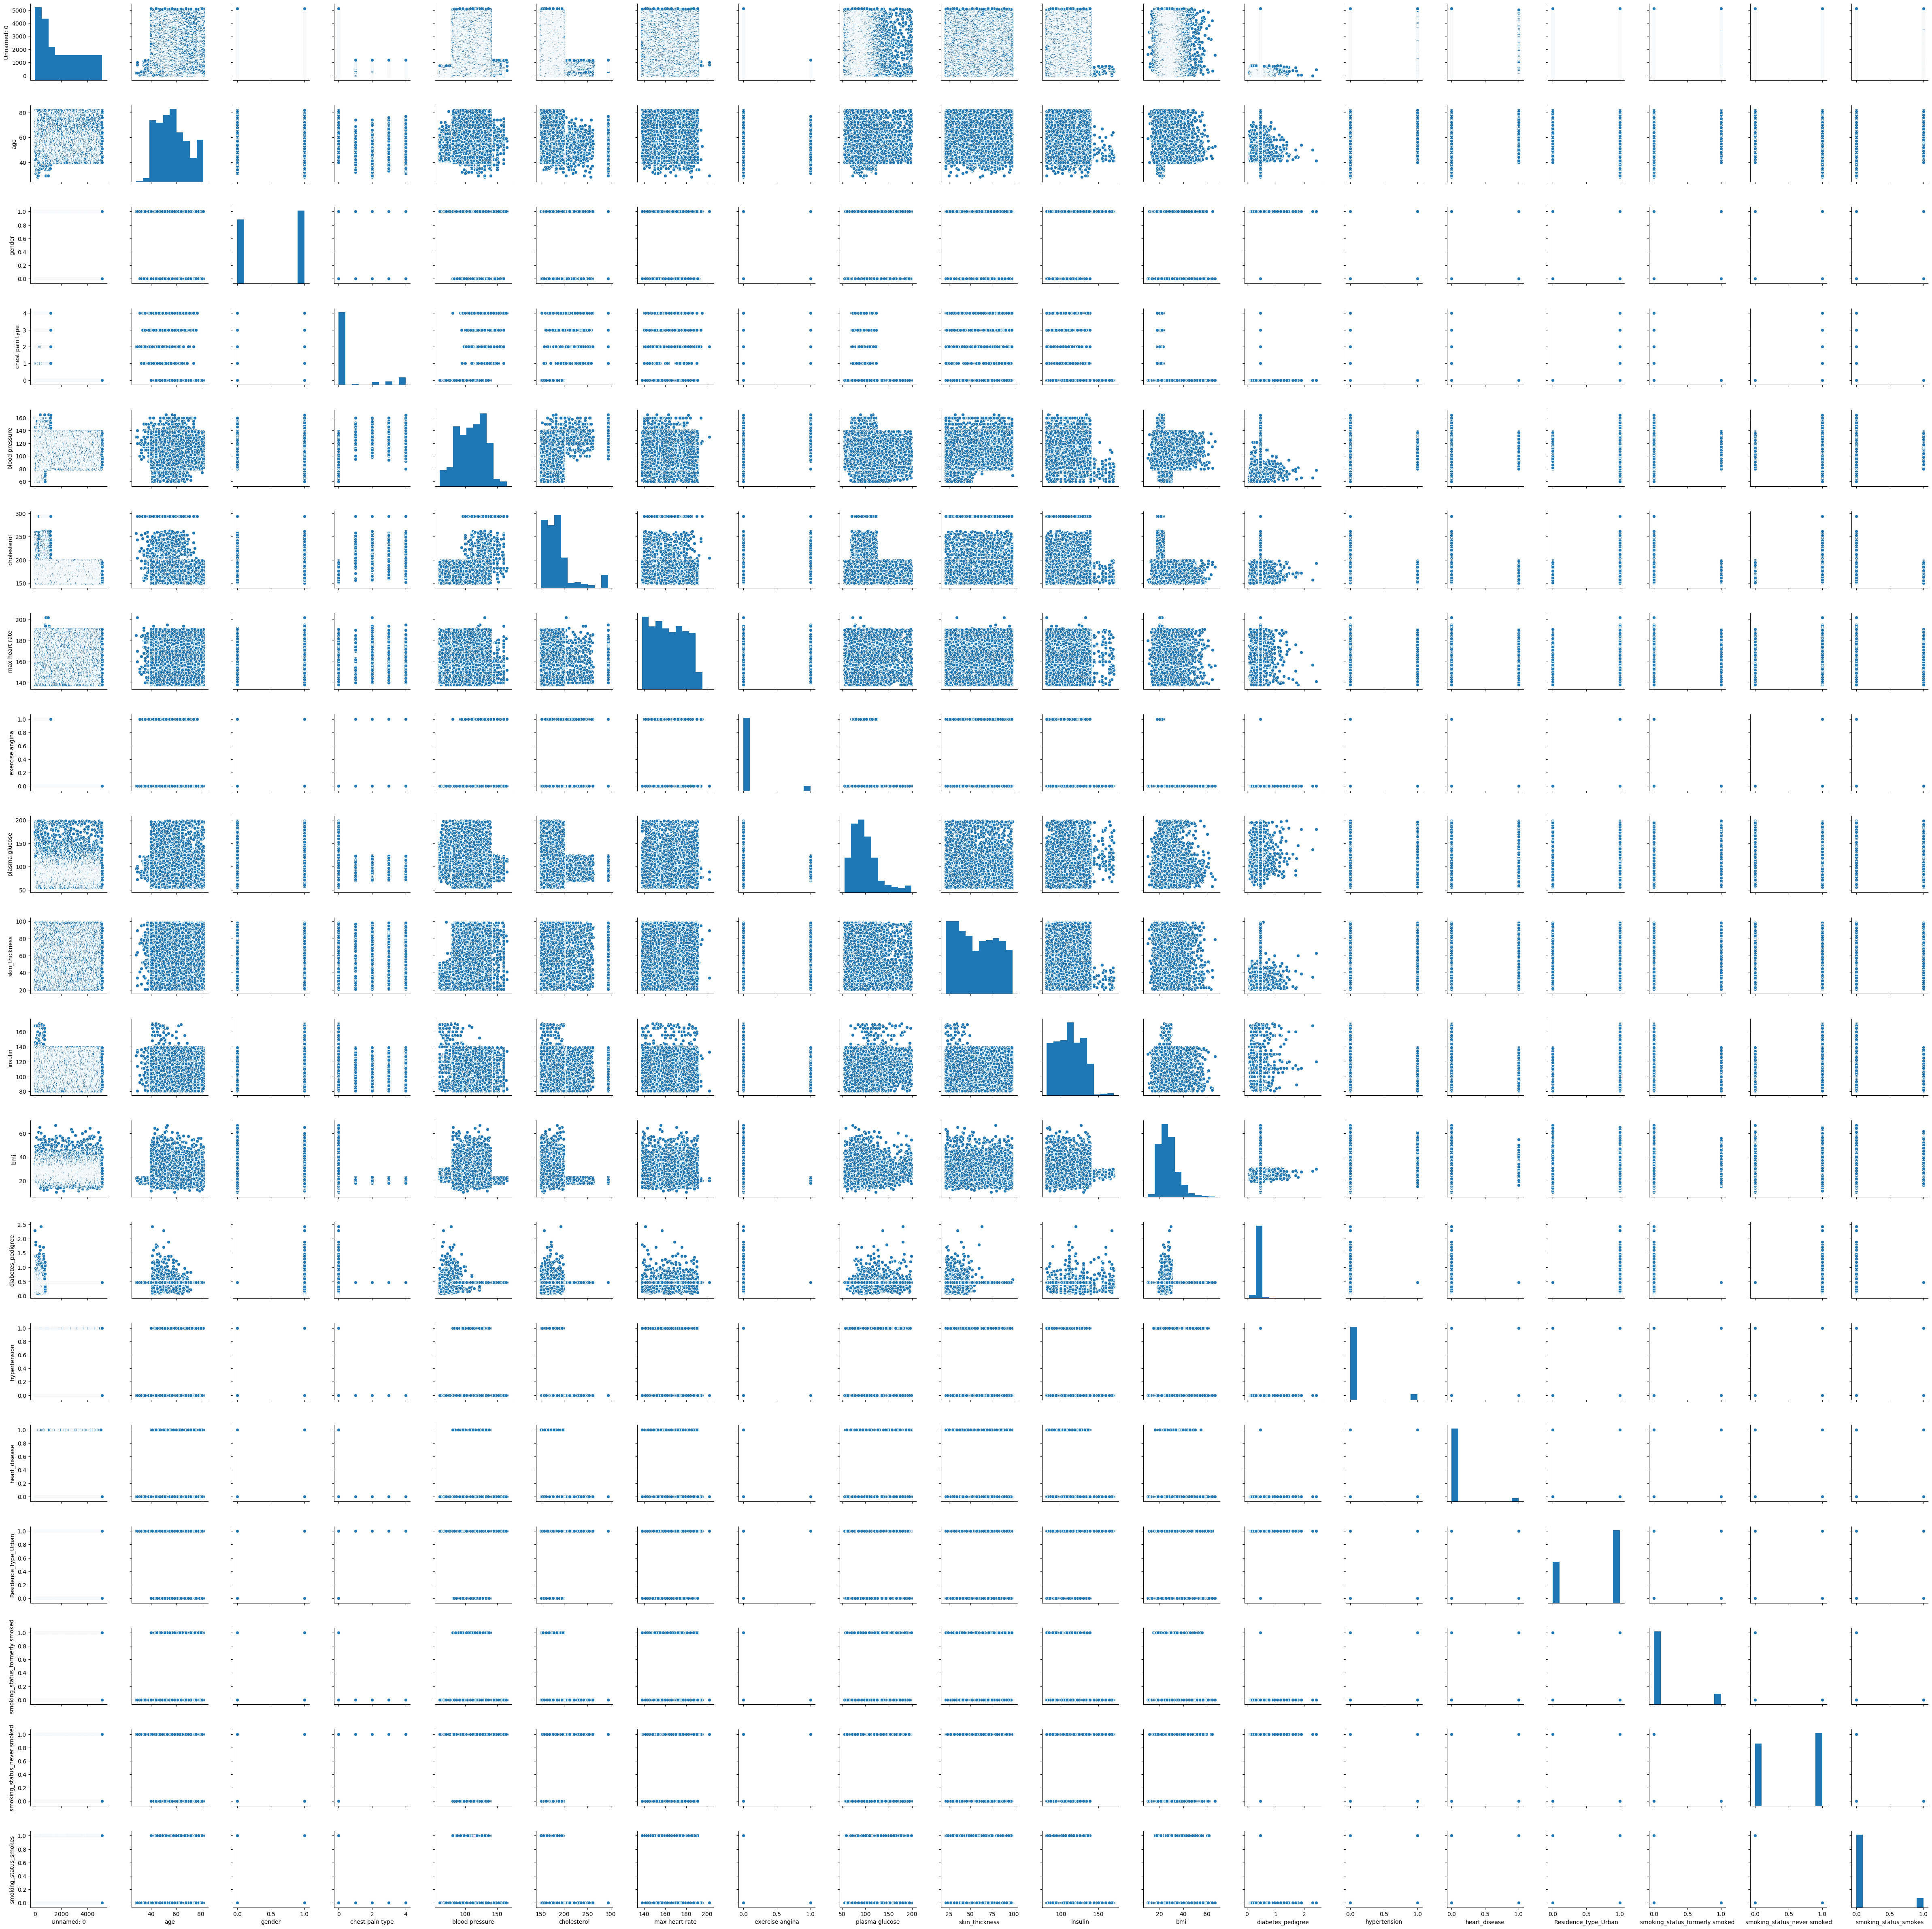

In [11]:
plt.figure(figsize = (10,8))
sns.pairplot(data)
plt.show()

### Observations from the Correlation Matrix (Heatmap):

1. **Age**:
   - Shows a weak positive correlation with blood pressure, which suggests that older patients are slightly more likely to have higher blood pressure.
   - Has a weak negative correlation with maximum heart rate, indicating that younger patients tend to have higher maximum heart rates during physical activity.

2. **Cholesterol**:
   - Exhibits a mild positive correlation with blood pressure, indicating that individuals with high cholesterol are more likely to have elevated blood pressure as well.
   
3. **Max Heart Rate**:
   - Displays a weak negative correlation with age, confirming that younger patients tend to achieve higher maximum heart rates during physical exertion.
   
4. **BMI**:
   - BMI shows weak correlations with both cholesterol and blood pressure, suggesting that individuals with higher BMI may have elevated cholesterol and blood pressure, though these correlations are not very strong.

### Observations from the Pair Plot (Scatter Plots and Histograms):

1. **Age vs. Max Heart Rate**:
   - The scatter plot between age and maximum heart rate reveals a clear inverse relationship, where older individuals tend to have lower maximum heart rates.
   
2. **Cholesterol Distribution**:
   - The histogram of cholesterol levels shows a concentration around 150-200 mg/dL, but with a notable number of patients exhibiting much higher cholesterol levels, suggesting potential risk for cardiovascular issues.
   
3. **Blood Pressure vs. Age**:
   - The scatter plot shows no strong relationship between blood pressure and age, though some outliers are evident in both younger and older age groups.

4. **BMI**:
   - The scatter plots involving BMI indicate a wide distribution of BMI values, with some possible correlations with cholesterol and blood pressure. However, no strong patterns are visible, indicating that BMI alone may not be a reliable predictor of these factors in this dataset.
   
### Conclusion:
The correlation matrix and pair plot provide useful insights into the relationships between features such as age, blood pressure, cholesterol, and BMI. These visualizations suggest some mild correlations, but most relationships are weak, meaning that no single feature dominates in terms of predictive power. Further analysis, such as clustering or classification, may help identify patterns in patient data that can assist in medical decision-making.

In [12]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()
# Fitting and transforming the data
scaled_data = scaler.fit_transform(data)

# Converting scaled data back to pandas DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data)

# Verifying scaling printing the header of scaled_df
scaled_df.head()

0         1    2     3         4         5        6    7         8   \
0  0.000000  0.222222  1.0  0.50  0.761905  1.000000  0.53125  0.0  0.367528   
1  0.000196  0.388889  0.0  0.75  0.952381  0.208333  0.28125  0.0  0.138171   
2  0.000391  0.166667  1.0  0.50  0.666667  1.000000  0.28125  0.0  0.298026   
3  0.000587  0.370370  0.0  1.00  0.742857  0.444444  0.28125  1.0  0.117320   
4  0.000783  0.481481  1.0  0.75  0.857143  0.312500  0.28125  0.0  0.367528   

         9         10        11        12   13   14   15   16   17   18  
0  0.282051  0.122222  0.153982  0.166262  0.0  0.0  1.0  0.0  1.0  0.0  
1  0.333333  0.100000  0.136283  0.166262  0.0  0.0  1.0  0.0  1.0  0.0  
2  0.410256  0.233333  0.224779  0.166262  0.0  0.0  1.0  0.0  1.0  0.0  
3  0.384615  0.411111  0.136283  0.166262  0.0  0.0  1.0  0.0  1.0  0.0  
4  0.884615  0.022222  0.189381  0.166262  0.0  0.0  1.0  0.0  1.0  0.0

In [ ]:
# Define parameter options for DBSCAN
db_param_options = [[0.3, 3], [0.3, 5], [0.5, 3], [0.5, 5], [0.7, 3], [0.7, 5], [0.9, 3], [0.9, 5], [0.3, 10], [0.5, 10]]

# Assuming 'scaled_df' is your preprocessed dataset (e.g., scaled using MinMaxScaler)

# List to store results
results = []

# Iterate over the different parameter combinations
for ep, min_sample in db_param_options:
    # Generate clusters using DBSCAN with the specified eps and min_samples
    db = DBSCAN(eps=ep, min_samples=min_sample)
    db_clusters = db.fit_predict(scaled_df)
    
    print(f"Eps: {ep}, Min Samples: {min_sample}")
    
    # Calculate the silhouette score (if possible)
    try:
        sil_score = silhouette_score(scaled_df, db_clusters)
        print(f"Silhouette Score: {sil_score}")
    except ValueError:
        sil_score = 'N/A'
        print("Unable to calculate silhouette score (only one cluster or noise)")
    
    # Append the results to the list
    results.append({
        'eps': ep,
        'min_samples': min_sample,
        'silhouette_score': sil_score
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

pd.DataFrame(results)

Eps: 0.3, Min Samples: 3
Silhouette Score: -0.422587648048414
Eps: 0.3, Min Samples: 5
Silhouette Score: -0.30608879089828267
Eps: 0.5, Min Samples: 3
Silhouette Score: 0.17599674518757782
Eps: 0.5, Min Samples: 5
Silhouette Score: 0.2048286587196644
Eps: 0.7, Min Samples: 3
Silhouette Score: 0.2887073191721116
Eps: 0.7, Min Samples: 5
Silhouette Score: 0.28106694833443246
Eps: 0.9, Min Samples: 3
Silhouette Score: 0.30144037606572716
Eps: 0.9, Min Samples: 5


Select the best model for the use case and justify your choice in markdown.

In [ ]:
# Find the model with the highest silhouette score
best_model = results_df.loc[results_df['silhouette_score'].idxmax()]

# Print the best model and its silhouette score
print(f"The best DBSCAN model has eps={best_model['eps']}, min_samples={best_model['min_samples']}, and a silhouette score of {best_model['silhouette_score']:.4f}")

In [ ]:
# Use the best parameters to fit DBSCAN
best_dbscan = DBSCAN(eps=best_model['eps'], min_samples=best_model['min_samples'])
best_clusters = best_dbscan.fit_predict(scaled_df)

# Choose two features (columns) from the dataset for the scatter plot (e.g., first two columns)
x_col = scaled_df.iloc[:, 0]  # First column
y_col = scaled_df.iloc[:, 1]  # Second column

# Create a scatter plot using Seaborn
plt.figure(figsize=(20, 20))
sns.scatterplot(x=x_col, y=y_col, hue=best_clusters, palette='Set1', s=100, legend="full")

# Using labels_ method within DBSCAN cluster as the hue parameter value to identify to which cluster belongs each
# data point
sns.scatterplot(data['chest pain type'], data['bmi'], hue = best_model.labels_, palette = 'tab10')
plt.title('chest pain type vs bmi')
plt.xlabel('chest pain type')
plt.ylabel('bmi')
plt.legend(title='Cluster', loc='upper right', frameon=True)
plt.show()

Use the model predictions to colour the points according to the cluster they belong to. Use markdown to comment on the plot.

In [ ]:
# Get unique clusters and their counts
unique_clusters, counts = np.unique(best_clusters, return_counts=True)

# Create a bar chart (histogram-like) showing the number of elements in each cluster
plt.figure(figsize=(20, 6))
plt.bar(unique_clusters, counts, color='skyblue')

# Customize the plot
plt.title("Number of Elements in Each Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.xticks(unique_clusters)  # Ensure all cluster labels are shown on the x-axis
plt.show()

In [ ]:
# Convert the cluster labels into a DataFrame for easy filtering
clustered_data = pd.DataFrame(scaled_data, columns=data.columns)
clustered_data['cluster'] = best_clusters

# Get the unique cluster labels (including noise, which might be labeled as -1)
unique_clusters = np.unique(best_clusters)

# Loop over each cluster and generate the summary statistics
for cluster_label in unique_clusters:
    print(f"Cluster {cluster_label} - Summary Statistics:")
    
    # Filter the DataFrame to get only the data for the current cluster
    cluster_df = clustered_data[clustered_data['cluster'] == cluster_label]
    
    # Show descriptive statistics for this cluster
    print(cluster_df.describe())
    print("\n" + "="*50 + "\n") 